# A Computer Vision Example
  
We will train a neural network to recognize items of clothing from a common dataset called Fashion MNIST

In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [9]:
#The Fashion MNIST data is available directly in the tf.keras datasets API. 
#You load it like this:

mnist = tf.keras.datasets.fashion_mnist

In [10]:
#Calling load_data on this object will give you two sets of two lists, 
#these will be the training and testing values for the 
#graphics that contain the clothing items and their labels.

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

6
[[  0   0   0   0   0   0   0   0   0   4   0   3 166 152 147 164   8   0
    3   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   2   5   0   0   0 122 239 214 214 232  97   0
    0   0   4   2   0   0   0   0   0   0]
 [  0   0   0   0   0   2   0   0   0  27 119 196 198 196 191 193 177 112
   34   0   0   0   1   0   0   0   0   0]
 [  0   0   0   0   1   0   0  90 179 188 189 185 201 199 200 183 174 177
  169 165 105  12   0   2   0   0   0   0]
 [  0   0   0   0   0   0 164 186 175 171 174 170 187 176 185 178 160 165
  166 171 181 162   0   0   0   0   0   0]
 [  0   0   0   0   0 121 210 176 181 178 181 175 177 175 169 172 171 175
  177 180 173 199 116   0   0   0   0   0]
 [  0   0   0   0   0 166 211 185 180 185 173 174 183 184 176 176 172 172
  180 171 186 203 183   0   0   0   0   0]
 [  0   0   0   0   0 194 210 206 180 175 188 176 176 178 180 178 177 179
  171 184 200 196 182   0   0   0   0   0]
 [  0   0   0   0  33 208 197 215 222 180 174 180 182 178 184 

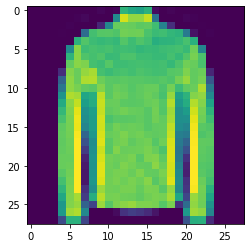

In [11]:
#What does these values look like? Let's print a training image, and a training label to see:
#You'll notice that all of the values in the number are between 0 and 255.

plt.imshow(training_images[970])
print(training_labels[970])
print(training_images[970])

In [12]:
#If we are training a neural network, for various reasons it's easier 
#if we treat all values as between 0 and 1, a process called 'normalizing'

training_images  = training_images / 255.0
test_images = test_images / 255.0

8
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.32156863 0.47843137 0.14509804 0.         0.01960784
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.00784314 0.
  0.14901961 0.39215686 0.10980392 0.4745098  0.         0.00392157
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.01960784 0.
  0.3372549  0.16862745 0.         0.53333333 0.05882353 0.
  0.00784314 0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.00784314 0.
 

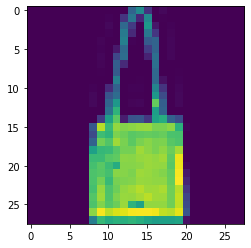

In [20]:
plt.imshow(training_images[200])
print(training_labels[200])
print(training_images[200])

In [14]:
#Let's now design the model:

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

__Sequential:__ That defines a SEQUENCE of layers in the neural network

__Flatten:__ Remember earlier where our images were a square, when you printed them out? Flatten just takes that square and turns it into a 1 dimensional set.

__Dense:__ Adds a layer of neurons
Each layer of neurons need an __activation function__ to tell them what to do.

__Relu__ effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

__Softmax__ takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding!

In [15]:
#The next thing to do, now the model is defined, is to actually build it.
#You do this by compiling it with an optimizer and loss function as before,
#and then you train it by calling *model.fit* 
#asking it to fit your training data to your training labels 

model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4978 - accuracy: 0.8264
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3744 - accuracy: 0.8647
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3331 - accuracy: 0.8779
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3094 - accuracy: 0.8862
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2927 - accuracy: 0.8914


# Consider experimenting with:
 - different values for the dense layer with 512, 1024, ... neurons
 - Consider the effects of additional layers in the network
 - the impact of training for more or less epochs
 - the impact of not Normalizing

In [16]:
#But how would it work with unseen data? That's why we have the test images. 
#We can call model.evaluate, and pass in the two sets, 
#and it will report back the loss for each. Let's give it a try:

model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3408 - accuracy: 0.8771


[0.3408336639404297, 0.8770999908447266]

In [28]:
classifications = model.predict(test_images)

print(classifications[500])

[3.75480391e-02 2.39720270e-02 5.43129802e-01 1.60099734e-02
 6.58312067e-02 4.90113507e-06 2.31832623e-01 1.09240595e-04
 8.15120190e-02 5.00857786e-05]


In [29]:
print(test_labels[500])

2


2
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.42352941 0.36470588
  0.14901961 0.         0.         0.         0.03137255 0.29803922
  0.54901961 0.13333333 0.         0.         0.         0.00392157
  0.00392157 0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.11764706 0.36078431 0.27058824 0.75294118 0.71764706
  0.58431373 0.83921569 0.69411765 0.76078431 0.89019608 0.60392157
  0.80784314 0.56078431 0.30980392 0.18039216 0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.23137255 0.49803922 0.45490196 0.33333333 0.24705882 0.72156863
  0.50196078 0.40784314 0.         0.03921569 0.49411765 0.54117647
  0.56862745 0.23137255 0.40784314 0.4627451  0.3372549  0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.01176471
  0.38823529 

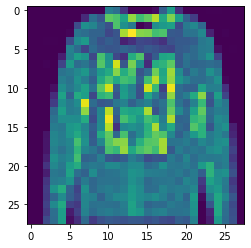

In [30]:
plt.imshow(test_images[500])
print(test_labels[500])
print(test_images[500])

# Using Callbacks
Using callbacks we can stop the training when we reach a desired value as shown:

In [31]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=20, callbacks=[callbacks])


Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4712 - accuracy: 0.8318
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3546 - accuracy: 0.8688
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3215 - accuracy: 0.8812
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2963 - accuracy: 0.8891
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2784 - accuracy: 0.8957
Epoch 6/20
1875/1875 [==============================] - ETA: 0s - loss: 0.2643 - accuracy: 0.9018
Reached 90% accuracy so cancelling training!
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2643 - accuracy: 0.9018
